# 🚀 filoma demo

Fast, multi-backend file analysis with a tiny API surface

filoma version: 1.7.3


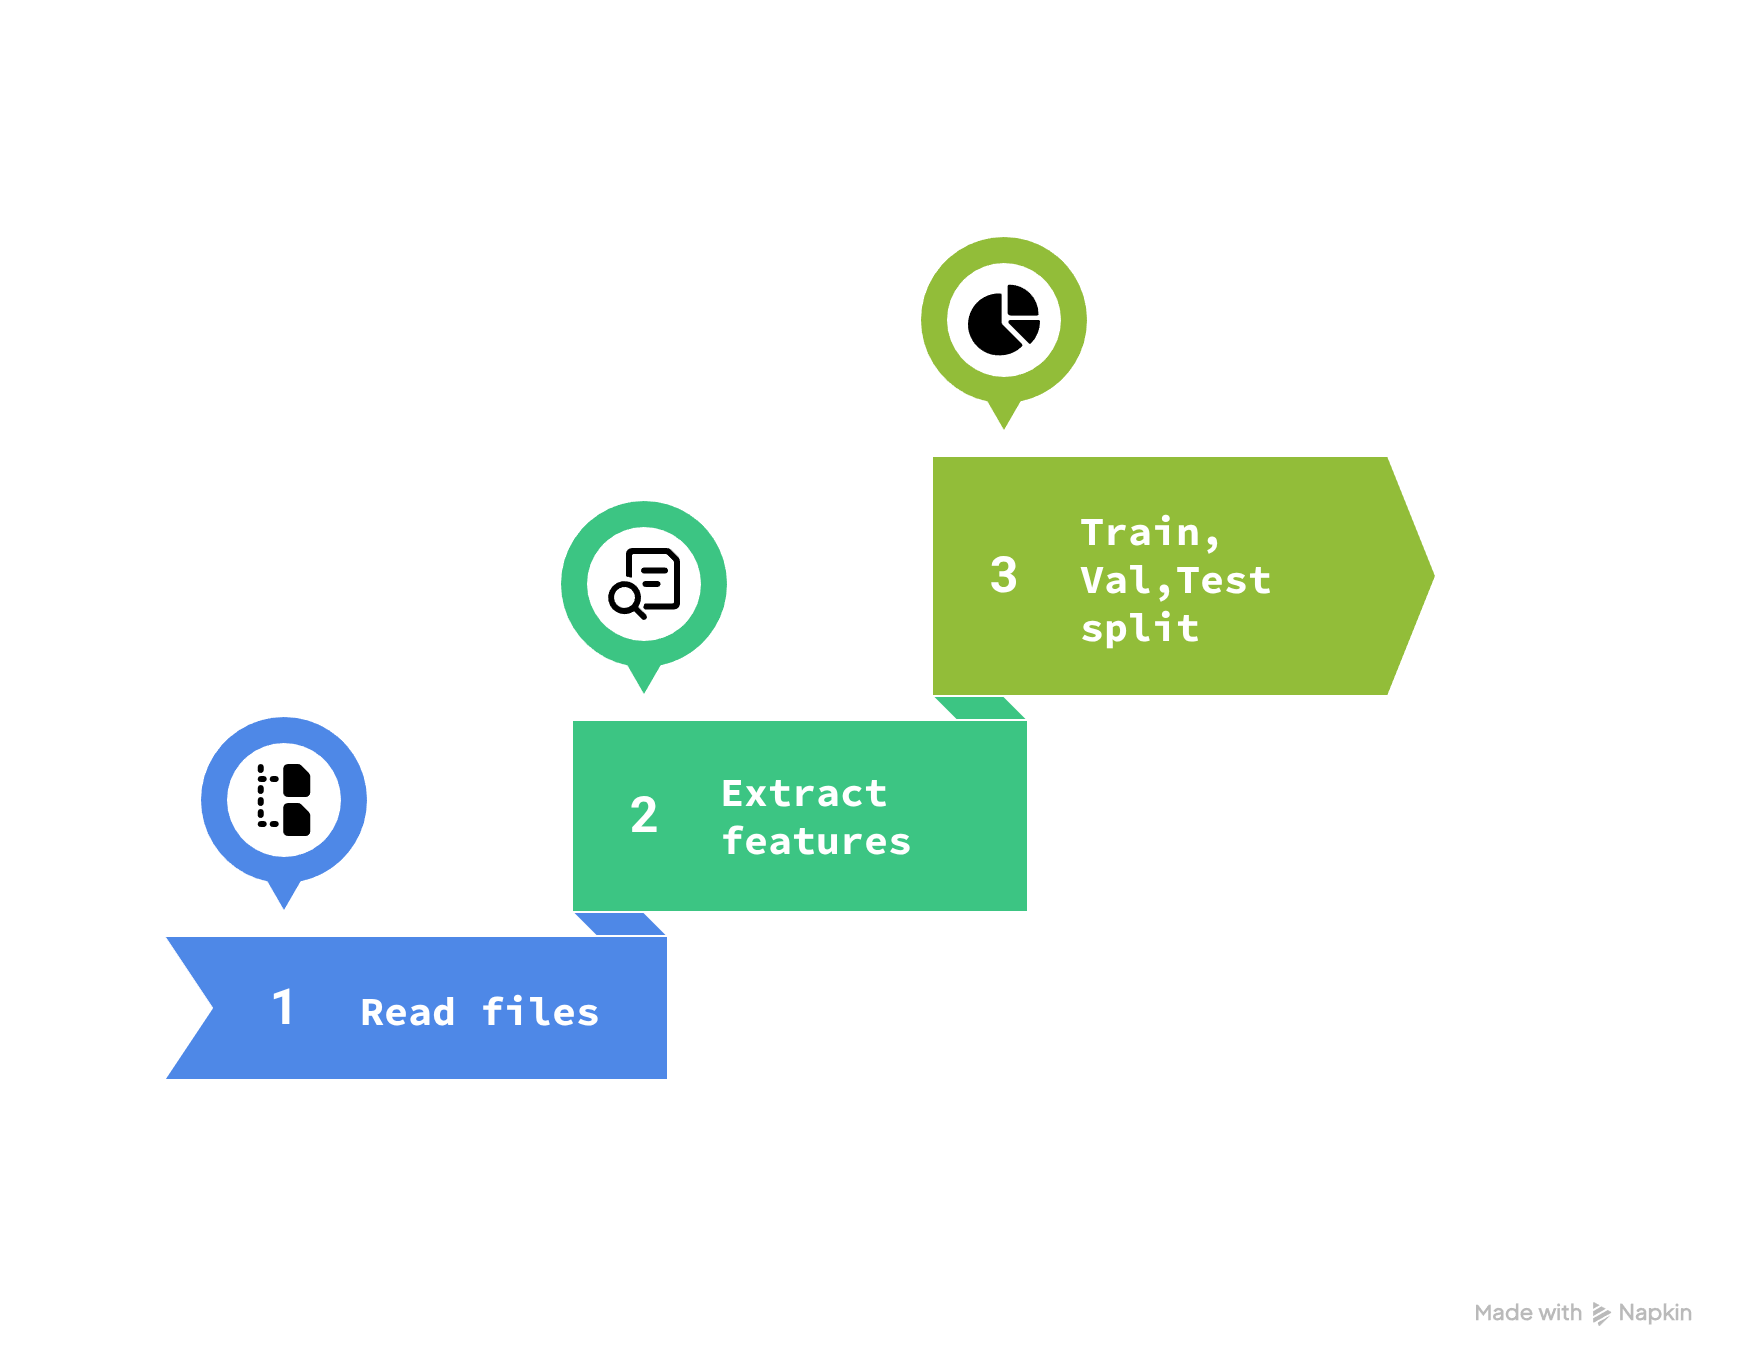

In [1]:
from IPython.display import Image

import filoma

print(f"filoma version: {filoma.__version__}")
Image("../images/flow.png", width=600)

Let's start with something simple, like getting a handy dataclass for a single file:

# 🔍📄 File analysis 

### 📄 Single file (any kind)

In [14]:
from filoma import probe_file

file_info = probe_file("../README.md")
print(f"Path: {file_info.path}")
print(f"Size: {file_info.size}")
print(f"Modified: {file_info.modified}")
print(f"file_info: {[i for i in dir(file_info) if not i.startswith('_')]}")

Path: /home/kalfasy/repos/filoma/README.md
Size: 10914
Modified: 2025-09-13 16:01:30
file_info: ['accessed', 'as_dict', 'created', 'from_report', 'get', 'group', 'inode', 'is_dir', 'is_file', 'is_symlink', 'items', 'keys', 'mode', 'mode_str', 'modified', 'nlink', 'owner', 'path', 'rights', 'sha256', 'size', 'target_is_dir', 'target_is_file', 'to_dict', 'values', 'xattrs']


or specifically for image files:

### 🖼️ Image file analysis

In [20]:
from filoma import probe_image

img = probe_image("../images/logo.png")
print(f"Type of file: {img.file_type}, Type of img object: {type(img)}")
print(f"Shape: {img.shape}")
print(f"Data range: {img.min} - {img.max}")
print(f"img info: {img.as_dict()}")

Type of file: png, Type of img object: <class 'filoma.images.image_profiler.ImageReport'>
Shape: (762, 628, 4)
Data range: 0.0 - 255.0
img info: {'path': '../images/logo.png', 'file_type': 'png', 'shape': (762, 628, 4), 'dtype': 'uint8', 'min': 0.0, 'max': 255.0, 'mean': 230.89027732500793, 'nans': 0, 'infs': 0, 'unique': 256, 'status': None}


# 🔍📁 Directory Analysis

Do you want to analyze a directory of files and extract metadata, text content, and other useful information?   
`filoma` makes it super easy to do so with just a few lines of code.

In [4]:
from filoma.directories import DirectoryProfiler, DirectoryProfilerConfig

# Create a profiler using the typed config dataclass
config = DirectoryProfilerConfig(use_rust=True)
dir_prof = DirectoryProfiler(config)

analysis = dir_prof.probe("../")
dir_prof.print_summary(analysis)

2025-09-13 17:06:41.242 | DEBUG    | filoma.directories.directory_profiler:__init__:343 - Interactive environment detected, disabling progress bars to avoid conflicts
2025-09-13 17:06:41.242 | INFO     | filoma.directories.directory_profiler:probe:430 - Starting directory analysis of '../' using 🦀 Rust (Parallel) implementation
2025-09-13 17:06:41.905 | SUCCESS  | filoma.directories.directory_profiler:probe:446 - Directory analysis completed in 0.66s - Found 65,517 items (61,493 files, 4,024 folders) using 🦀 Rust (Parallel)


 Directory Analysis: /home/kalfasy/repos/filoma (🦀  
              Rust (Parallel)) - 0.66s               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric                   ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Total Files              │ 61,493                 │
│ Total Folders            │ 4,024                  │
│ Total Size               │ 2,032.7302560806274 MB │
│ Average Files per Folder │ 15.281560636182903     │
│ Maximum Depth            │ 14                     │
│ Empty Folders            │ 53                     │
│ Analysis Time            │ 0.66s                  │
│ Processing Speed         │ 98,908 items/sec       │
└──────────────────────────┴────────────────────────┘

Want to quickly see a report of your findings? filoma has you covered.

In [5]:
dir_prof.print_report(analysis)

 Directory Analysis: /home/kalfasy/repos/filoma (🦀  
              Rust (Parallel)) - 0.66s               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric                   ┃ Value                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Total Files              │ 61,493                 │
│ Total Folders            │ 4,024                  │
│ Total Size               │ 2,032.7302560806274 MB │
│ Average Files per Folder │ 15.281560636182903     │
│ Maximum Depth            │ 14                     │
│ Empty Folders            │ 53                     │
│ Analysis Time            │ 0.66s                  │
│ Processing Speed         │ 98,908 items/sec       │
└──────────────────────────┴────────────────────────┘

         File Extensions          
┏━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Extension ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ .2        │ 8     │ 0.0%       │
│ .inv      │ 1     │ 0.0%       │
│ .xml      │ 7     │ 0.0%       │
│ .3        │ 6     │ 0.0%       │
│ .map      │ 16    │ 0.0%       │
│ .bz2      │ 2     │ 0.0%       │
│ .go       │ 2     │ 0.0%       │
│ .a        │ 4     │ 0.0%       │
│ .pth      │ 4     │ 0.0%       │
│ .md       │ 40    │ 0.1%       │
└───────────┴───────┴────────────┘

     Common Folder Names     
┏━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Folder Name ┃ Occurrences ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ seed        │ 2           │
│ E           │ 1           │
│ pymdownx    │ 2           │
│ Brazil      │ 4           │
│ resources   │ 4           │
│ aiofiles    │ 2           │
│ pack        │ 1           │
│ testing     │ 12          │
│ tests       │ 56          │
│ 67          │ 1           │
└─────────────┴─────────────┘

                             Empty Folders (showing 20 of 53)                             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Path                                                                                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ /home/kalfasy/repos/filoma/notebooks/tests                                             │
│ /home/kalfasy/repos/filoma/target/debug/build/proc-macro2-fdcb222da4373f07/out         │
│ /home/kalfasy/repos/filoma/target/debug/build/pyo3-17c1b0b456a0c7e4/out                │
│ /home/kalfasy/repos/filoma/target/debug/build/crossbeam-utils-7b9bd07d9fad49b5/out     │
│ /home/kalfasy/repos/filoma/target/debug/build/serde_json-85cdf3d882972d5c/out          │
│ /home/kalfasy/repos/filoma/target/debug/build/pyo3-8813d706ead48d90/out                │
│ /home/kalfasy/repos/filoma/target/debug/build/pyo3-macros-backend-6807c5cda8b1462a/out │
│ /home/kalfasy/repos/filoma/target/debug/build/memoffset-f4a6c90d4e3f18eb/out           │
│ /home/kalfasy/repos/filoma/target/debug/build/rayon-core-03a79c366c595edc/out          │
│ /home/kalfasy/repos/filoma/target/debug/build/pyo3-macros-backend-3864f2b2dbf9644d/out │
│ /home/kalfasy/repos/filoma/target/debug/build/pyo3-264b9b4aa4d6a2b5/out                │
│ /home/kalfasy/repos/filoma/target/debug/build/portable-atomic-f4353affba5b92e8/out     │
│ /home/kalfasy/repos/filoma/target/debug/build/pyo3-ffi-747a9d93a69eb79b/out            │
│ /home/kalfasy/repos/filoma/target/debug/build/proc-macro2-4d577003447afa24/out         │
│ /home/kalfasy/repos/filoma/target/debug/build/pyo3-ffi-8e536f56d2d22bd8/out            │
│ /home/kalfasy/repos/filoma/target/debug/build/libc-9d68f4abca27c9af/out                │
│ /home/kalfasy/repos/filoma/target/debug/build/lock_api-96adb08174198570/out            │
│ /home/kalfasy/repos/filoma/target/debug/build/serde-6690732fba37d144/out               │
│ /home/kalfasy/repos/filoma/target/debug/build/parking_lot_core-d5ba795b49a036a8/out    │
│ /home/kalfasy/repos/filoma/target/debug/build/pyo3-ffi-0b1b893f015622ee/out            │
│ ... and 33 more                                                                        │
└────────────────────────────────────────────────────────────────────────────────────────┘

# 📁 Directory of files --> DataFrame --> Data Exploration

Now that you saw what's up with your files, you might want to explore the data in a familiar format.   
`filoma` can convert the analysis results into a Polars (or Pandas) DataFrame real quick.  
**NOTE**: Pandas support requires the `pd` extra which you can install by running `uv sync --extra pd` in your terminal.

In [6]:
from filoma import probe_to_df

df = probe_to_df("../", max_depth=2, enrich=True)
print(f"Found {len(df)} files")
df.head()

2025-09-13 17:06:41.923 | DEBUG    | filoma.directories.directory_profiler:__init__:343 - Interactive environment detected, disabling progress bars to avoid conflicts
2025-09-13 17:06:41.923 | INFO     | filoma.directories.directory_profiler:probe:430 - Starting directory analysis of '../' using 🐍 Python implementation
2025-09-13 17:06:42.318 | SUCCESS  | filoma.directories.directory_profiler:probe:446 - Directory analysis completed in 0.39s - Found 374 items (313 files, 61 folders) using 🐍 Python


Found 373 files


path,depth,parent,name,stem,suffix,size_bytes,modified_time,created_time,is_file,is_dir,owner,group,mode_str,inode,nlink,sha256,xattrs
str,i64,str,str,str,str,i64,str,str,bool,bool,str,str,str,i64,i64,str,str
"""../pyproject.toml""",1,"""..""","""pyproject.toml""","""pyproject""",""".toml""",1838,"""2025-09-11 18:00:08""","""2025-09-11 18:00:08""",true,false,"""kalfasy""","""kalfasy""","""-rw-rw-r--""",7579961,1,null,"""{}"""
"""../scripts""",1,"""..""","""scripts""","""scripts""","""""",4096,"""2025-09-05 20:26:25""","""2025-09-05 20:26:25""",false,true,"""kalfasy""","""kalfasy""","""drwxrwxr-x""",7603122,2,null,"""{}"""
"""../.pytest_cache""",1,"""..""",""".pytest_cache""",""".pytest_cache""","""""",4096,"""2025-07-05 22:28:03""","""2025-07-05 22:28:03""",false,true,"""kalfasy""","""kalfasy""","""drwxrwxr-x""",7604845,3,null,"""{}"""
"""../.vscode""",1,"""..""",""".vscode""",""".vscode""","""""",4096,"""2025-07-06 11:11:18""","""2025-07-06 11:11:18""",false,true,"""kalfasy""","""kalfasy""","""drwxrwxr-x""",7591635,2,null,"""{}"""
"""../Makefile""",1,"""..""","""Makefile""","""Makefile""","""""",2876,"""2025-09-13 12:14:25""","""2025-09-13 12:14:25""",true,false,"""kalfasy""","""kalfasy""","""-rw-rw-r--""",7603119,1,null,"""{}"""


In [7]:
print(f"Type of df:\t{type(df.to_pandas())}, \nShape of df:\t{df.to_pandas().shape}")

Type of df:	<class 'pandas.core.frame.DataFrame'>, 
Shape of df:	(373, 18)


# ⚡ DataFrame enrichment

You're probably wondering "what is `enrich=True`?"  
Well, since `filoma` gathers the paths of your files in a DataFrame, why not enrich this DataFrame with additional metadata. Its own `DataFrame` class has convenience functions like: `add_path_components()`, `add_file_stats_cols()`, `add_depth_col()`  
  
Let's see it in action:

In [8]:
from rich.console import Console
from rich.panel import Panel

console = Console()

cfg = DirectoryProfilerConfig(build_dataframe=True, use_rust=True, return_absolute_paths=True)
dprof = DirectoryProfiler(cfg)
res = dprof.probe("../")

orig_cols = list(res.dataframe.columns)
console.print(Panel(f"Columns before enrich: [bold]{', '.join(orig_cols)}[/]"))
console.print(Panel(res.dataframe.head(3).to_pandas().to_string(index=False), title="DataFrame head (before enrich)"))

df = res.dataframe.enrich()
new_cols = sorted(set(df.columns) - set(orig_cols))
console.print(Panel(f"New columns after enrich: [bold]{', '.join(new_cols)}[/]"))
console.print(Panel(df.head(3).to_pandas().to_string(index=False), title="DataFrame head (after enrich)"))


2025-09-13 17:06:42.388 | DEBUG    | filoma.directories.directory_profiler:__init__:343 - Interactive environment detected, disabling progress bars to avoid conflicts
2025-09-13 17:06:42.389 | INFO     | filoma.directories.directory_profiler:probe:430 - Starting directory analysis of '../' using 🦀 Rust (Parallel) implementation
2025-09-13 17:06:43.279 | SUCCESS  | filoma.directories.directory_profiler:probe:446 - Directory analysis completed in 0.89s - Found 65,517 items (61,493 files, 4,024 folders) using 🦀 Rust (Parallel)


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Columns before enrich: path                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────── DataFrame head (before enrich) ─────────────────────────────────────────╮
│              path                                                                                               │
│ ../pyproject.toml                                                                                               │
│        ../scripts                                                                                               │
│  ../.pytest_cache                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ New columns after enrich: created_time, depth, group, inode, is_dir, is_file, mode_str, modified_time, name,    │
│ nlink, owner, parent, sha256, size_bytes, stem, suffix, xattrs                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────── DataFrame head (after enrich) ─────────────────────────────────────────╮
│              path parent           name          stem suffix  size_bytes       modified_time                    │
│ created_time  is_file  is_dir   owner   group   mode_str   inode  nlink sha256 xattrs  depth                    │
│ ../pyproject.toml     .. pyproject.toml     pyproject  .toml        1838 2025-09-11 18:00:08 2025-09-11         │
│ 18:00:08     True   False kalfasy kalfasy -rw-rw-r-- 7579961      1   None     {}      1                        │
│        ../scripts     ..        scripts       scripts               4096 2025-09-05 20:26:25 2025-09-05         │
│ 20:26:25    False    True kalfasy kalfasy drwxrwxr-x 7603122      2   None     {}      1                        │
│  ../.pytest_cache     ..  .pytest_cache .pytest_cache               4096 2025-07-05 22:28:03 2025-07-05         │
│ 22:28:03    False    True kalfasy kalfasy drwxrwxr-x 7604845      3   None     {}      1                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# 🤖 ML-ready splits (train, val, test)

The next logical thing for `filoma` to serve in data science workflows is to provide easy ways to create ML-ready splits.  

In a very simple case, you have a dataframe with a `split`/`label`/... column that you want to use to create the splits like so:  
> train, val, test = df[df["split"] == "train"], df[df["split"] == "val"], df[df["split"] == "test"]  

But things are rarely that simple in practice.  

When you're given data in the "real world", either in folders & files or in a dataframe, you often need to create the splits yourself.  
  
>*Many practicioners unfortunately often disregard the importance of the data splits and split their data randomly, which can lead to data leakage, overfitting issues and unrealistic performance metrics*  

A minimum best practice is to split your data into 3 sets:  
- *Training set*: used to train your model
- *Validation set*: used to tune your model's hyperparameters
- *Testing set*: used to evaluate the final performance of your model  

Ideally, you'd want to use a validation set that is representative of your test set, and both should be representative of your real-world data. So, special care should be taken to ensure that the splits are done correctly.  

##### 📚 traditional `sklearn` way

A very popular (if not the most popular) way of splitting data, is to use `scikit-learn`'s function called `train_test_split` that can split your data into training and testing sets. It can do that for you rather easily, although you'll need to call it twice if you want a 3-way split.:  
> from sklearn.model_selection import train_test_split  
> train, temp = train_test_split(df, test_size=0.4)  
> val, test = train_test_split(temp, test_size=0.5)  

Isn't it confusing that you just wanted a 60/20/20 split but had to specify 40% and then 50%? Imagine doing this for a 70/20/10 split...
> from sklearn.model_selection import train_test_split  
> train, temp = train_test_split(df, test_size=0.3)  
> val, test = train_test_split(temp, test_size=0.3333)  

##### 🧙‍♂️ filoma's `split` method


`filoma` takes this a step further by providing a function that can not only split your data into training, validation, and testing sets in one-go, but also do that based on features found in your file-names or directories.  


For example, your data might have subcategories encoded in filenames
like `dog_bulldog_001.jpg`, `dog_bulldog_002.jpg`, `cat_siamese_001.jpg`, etc.
You can use `filoma`'s `add_filename_features()` to extract these features into separate columns. Plus, you can name these columns whatever you want!

## 🐶 Example: splitting pet images by breed
##### Create a DataFrame with file paths

In [9]:
from filoma import DataFrame

breeds_by_species = {
    "dog": ["labrador", "beagle", "bulldog", "poodle"],
    "cat": ["siamese", "mainecoon", "persian", "ragdoll"],
    "bird": ["sparrow", "robin", "parrot", "crow"],
}

colors_by_breed = {
    "labrador": ["black", "yellow", "chocolate"],
    "beagle": ["tricolor", "brown"],
    "bulldog": ["fawn", "white"],
    "poodle": ["white", "black"],
    "siamese": ["sealpoint", "bluepoint"],
    "mainecoon": ["tabby", "brown"],
    "persian": ["white", "silver"],
    "ragdoll": ["colorpoint", "sealpoint"],
    "sparrow": ["hatchling", "adult"],
    "robin": ["adult", "juvenile"],
    "parrot": ["green", "red"],
    "crow": ["black"],
}

# build all (species, breed, color) combos
combos = []
for species, breeds in breeds_by_species.items():
    for breed in breeds:
        colors = colors_by_breed.get(breed, ["unknown"])
        for color in colors:
            combos.append((species, breed, color))

# generate 100 file paths cycling through combos and numbering files
paths = []
for i in range(1, 101):
    species, breed, color = combos[(i - 1) % len(combos)]
    paths.append(f"{species}/{breed}_{color}_{i:03d}.jpg")

data = {"path": paths}

df = DataFrame(data)
print("Small sample of the DataFrame:")
df.sample(5)

Small sample of the DataFrame:


path
str
"""bird/parrot_red_095.jpg"""
"""dog/labrador_yellow_098.jpg"""
"""dog/labrador_chocolate_003.jpg"""
"""cat/persian_white_062.jpg"""
"""dog/bulldog_fawn_078.jpg"""


##### Add path components as columns

In [10]:
df.add_filename_features(path_col="path", sep="_", token_names=["breed", "color", "number"], inplace=True)

path,breed,color,number
str,str,str,str
"""dog/labrador_black_001.jpg""","""labrador""","""black""","""001"""
"""dog/labrador_yellow_002.jpg""","""labrador""","""yellow""","""002"""
"""dog/labrador_chocolate_003.jpg""","""labrador""","""chocolate""","""003"""
"""dog/beagle_tricolor_004.jpg""","""beagle""","""tricolor""","""004"""
"""dog/beagle_brown_005.jpg""","""beagle""","""brown""","""005"""
…,…,…,…
"""bird/crow_black_096.jpg""","""crow""","""black""","""096"""
"""dog/labrador_black_097.jpg""","""labrador""","""black""","""097"""
"""dog/labrador_yellow_098.jpg""","""labrador""","""yellow""","""098"""


##### Split by breed while preserving distribution

In [11]:
train, val, test = df.split_data(seed=42, train_val_test=(70, 20, 10), feature="breed")
print(f"Shapes of train, val, test: {train.shape}, {val.shape}, {test.shape}")

2025-09-13 17:06:48.820 | WARNING  | filoma.ml:split_data:465 - filoma.ml.split_data: unique feature values differ across splits for '_feat_group' - counts train=8, val=3, test=1; examples missing_in_train=['bulldog', 'poodle', 'beagle', 'labrador'], missing_in_val=['siamese', 'persian', 'ragdoll', 'crow', 'parrot'], missing_in_test=['siamese', 'persian', 'labrador', 'bulldog', 'ragdoll']
2025-09-13 17:06:48.820 | WARNING  | filoma.ml:_maybe_log_ratio_drift:329 - filoma.ml.split_data: requested ratios 70.0%,20.0%,10.0% -> achieved counts (60, 32, 8) (60.0%,32.0%,8.0%) vs requested (70.0%,20.0%,10.0%) total=100 (grouped hashing can cause drift)


Shapes of train, val, test: (60, 5), (32, 5), (8, 5)


Note that `filoma` warns you of two things:  
1. It found that some categories have very few samples, which led to splits that do not have all categories represented.
2. It tried to preserve the distribution of your selected column(s) across the splits, but it couldn't do it perfectly because some categories had very few samples.

## ✅ Conclusion

So this is how you can use `filoma` to go from a scary dataset directory tree to a clean DataFrame with enriched metadata and ML-ready splits, all with just a few lines of code!